In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Load the enriched combined dataset
df = pd.read_csv("../result/time-series-data/t2_combined_enriched.csv")

config_columns = ["timeout_sec", "retry_attempts", "http2MaxRequests", "http1MaxPendingRequests", "consecutive5xxErrors"]
metric_columns = [
    "rps_user", "avg_latency_ms", "latency_p99_ms", "latency_p95_ms", "latency_p50_ms",
    "success_rate", "error_rate_5xx", "inbond_bandwidth", "outbond_bandwidth",
    "retries_per_sec", "envoy_cpu_cores", "envoy_mem_bytes", "upstream_rq_pending_overflow",
    "requests_per_core", "bandwidth_per_request", "memory_per_request", "latency_spread"
]

X = df[metric_columns].fillna(0)

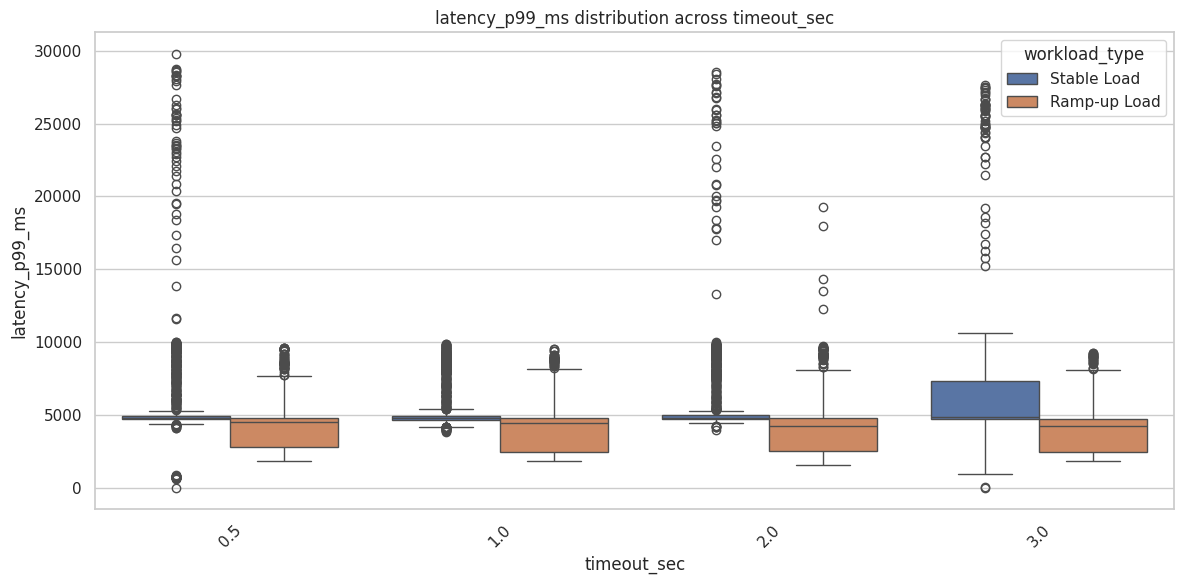

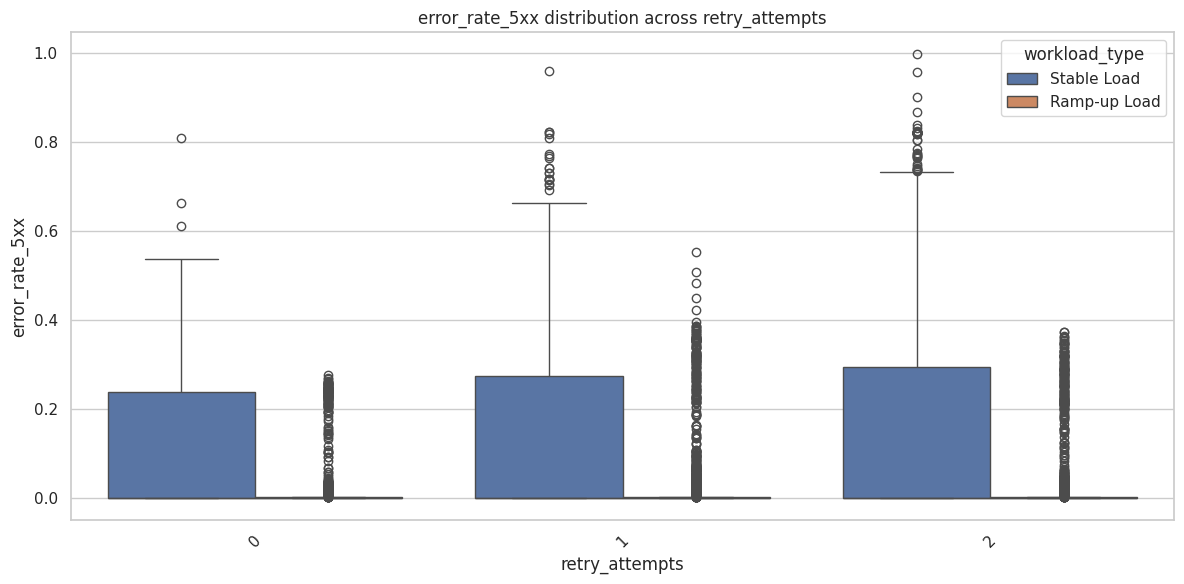

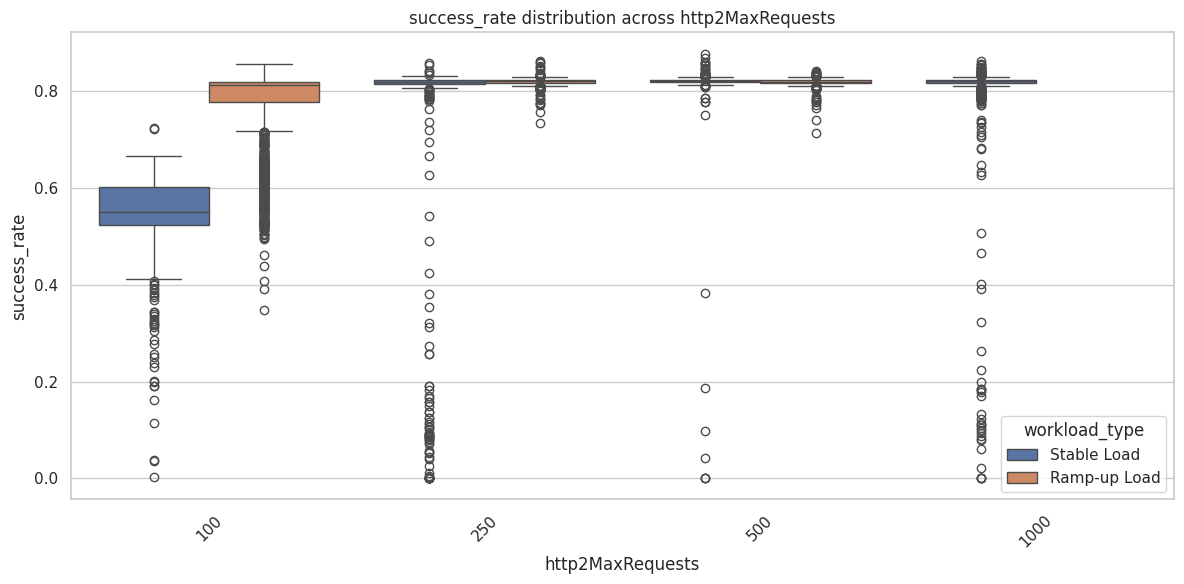

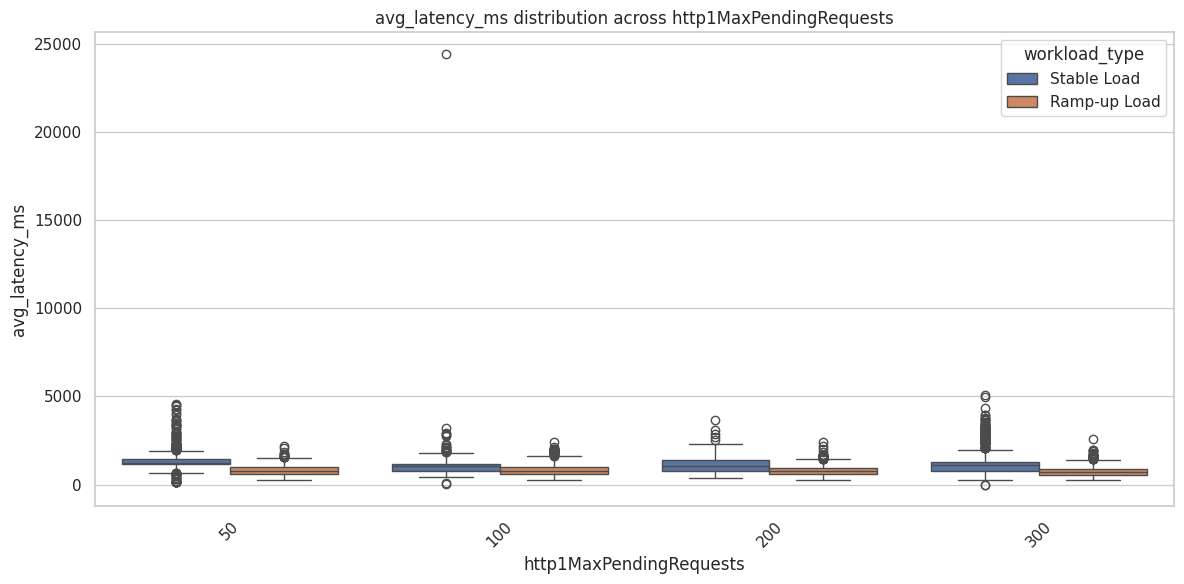

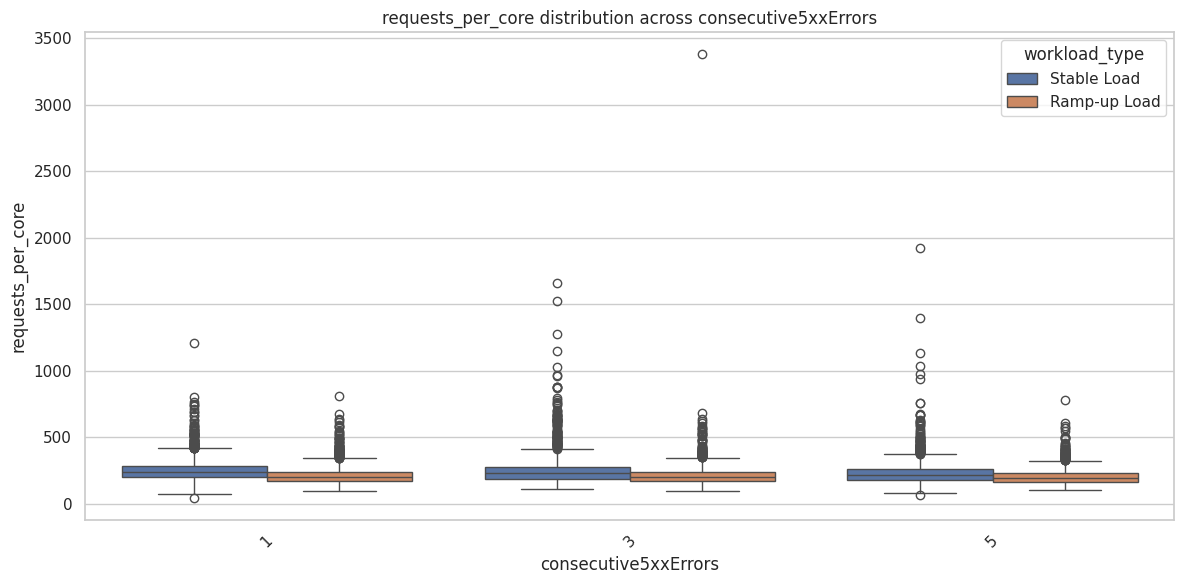

In [10]:
# Set visualization style
sns.set(style="whitegrid")

# Define config-metric pairs for visualization
config_metric_pairs = [
    ("timeout_sec", "latency_p99_ms"),
    ("retry_attempts", "error_rate_5xx"),
    ("http2MaxRequests", "success_rate"),
    ("http1MaxPendingRequests", "avg_latency_ms"),
    ("consecutive5xxErrors", "requests_per_core")
]

# Generate and display box plots
for config_col, metric_col in config_metric_pairs:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=config_col, y=metric_col, hue="workload_type")
    plt.title(f"{metric_col} distribution across {config_col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()